In [2]:
import pandas as pd

In [3]:
funding_rounds = pd.read_csv('../data/funding_rounds.csv')
print(funding_rounds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52626 entries, 0 to 52625
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        52626 non-null  int64  
 1   funding_round_id          52626 non-null  int64  
 2   object_id                 52626 non-null  object 
 3   funded_at                 52382 non-null  object 
 4   funding_round_type        52626 non-null  object 
 5   funding_round_code        52626 non-null  object 
 6   raised_amount_usd         52626 non-null  float64
 7   raised_amount             52626 non-null  float64
 8   raised_currency_code      49605 non-null  object 
 9   pre_money_valuation_usd   52626 non-null  float64
 10  pre_money_valuation       52626 non-null  float64
 11  pre_money_currency_code   26813 non-null  object 
 12  post_money_valuation_usd  52626 non-null  float64
 13  post_money_valuation      52626 non-null  float64
 14  post_m

In [4]:
funding_rounds.head(5)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


## Mean of raised money by year

In [5]:
funding_rounds['funding_round_type'].unique()

array(['series-b', 'angel', 'series-a', 'series-c+', 'venture', 'other',
       'private-equity', 'post-ipo', 'crowdfunding'], dtype=object)

In [6]:
funding_rounds['funded_at'] = pd.to_datetime(funding_rounds['funded_at'])
print(funding_rounds['funded_at'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 52626 entries, 0 to 52625
Series name: funded_at
Non-Null Count  Dtype         
--------------  -----         
52382 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 411.3 KB
None


In [7]:
funding_rounds['funded_at_year'] = funding_rounds['funded_at'].apply(lambda x: x.year)
funding_rounds['funded_at_year'].head()

0    2006.0
1    2004.0
2    2005.0
3    2006.0
4    2006.0
Name: funded_at_year, dtype: float64

In [8]:
mean_raised_amount_by_year = funding_rounds.groupby(by='funded_at_year', dropna=True, as_index=False)['raised_amount_usd'].mean()
mean_raised_amount_by_year = mean_raised_amount_by_year[mean_raised_amount_by_year['funded_at_year'] >= 2000]
mean_raised_amount_by_year['raised_amount_mln_usd'] = round(mean_raised_amount_by_year['raised_amount_usd'] / 1e6, 2)
mean_raised_amount_by_year.head()

,funded_at_year,raised_amount_usd,raised_amount_mln_usd
16,2000.0,1.148551e+07,11.49
17,2001.0,8.777271e+06,8.78
18,2002.0,7.891293e+06,7.89
19,2003.0,5.876084e+06,5.88
20,2004.0,7.692241e+06,7.69


In [9]:
import seaborn as sns

<Axes: xlabel='funded_at_year', ylabel='raised_amount_mln_usd'>

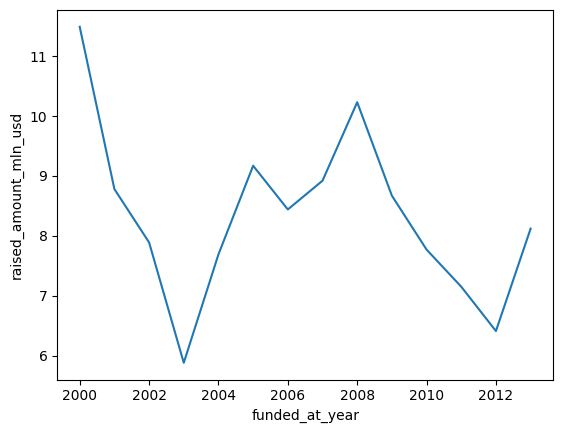

In [10]:
sns.lineplot(x='funded_at_year', y='raised_amount_mln_usd', data=mean_raised_amount_by_year)

## raised amount by categories

In [11]:
objects = pd.read_csv('fixed_dataset/objects.csv')
print(objects.info())

/var/folders/p2/skh823fd5t5fcl9_fbmxvw24rb6_10/T/ipykernel_47403/953361758.py:1: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects = pd.read_csv('fixed_dataset/objects.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462651 entries, 0 to 462650
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   462651 non-null  object 
 1   entity_type          462651 non-null  object 
 2   entity_id            462651 non-null  int64  
 3   parent_id            27715 non-null   object 
 4   name                 462647 non-null  object 
 5   normalized_name      462620 non-null  object 
 6   permalink            462651 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               462651 non-null  object 
 9   founded_at           100441 non-null  object 
 10  closed_at            2809 non-null    object 
 11  domain               174942 non-null  object 
 12  homepage_url         174942 non-null  object 
 13  twitter_username     126089 non-null  object 
 14  logo_url             208850 non-null  object 
 15  logo_width       

In [12]:
objects['category_code'].unique()

array(['web', 'games_video', 'network_hosting', 'advertising',
       'cleantech', nan, 'enterprise', 'other', 'consulting', 'mobile',
       'health', 'software', 'analytics', 'finance', 'education',
       'medical', 'manufacturing', 'biotech', 'ecommerce',
       'public_relations', 'hardware', 'search', 'news', 'government',
       'security', 'photo_video', 'travel', 'semiconductor', 'social',
       'legal', 'transportation', 'hospitality', 'sports', 'nonprofit',
       'fashion', 'messaging', 'music', 'automotive', 'design',
       'real_estate', 'local', 'nanotech', 'pets'], dtype=object)

In [13]:
companies = objects[
    (objects['entity_type'] == 'Company')
]

In [14]:
companies_clean = companies[~(
   companies['category_code'].isnull() |
   companies['country_code'].isnull() | 
   companies['founded_at'].isnull()
)]

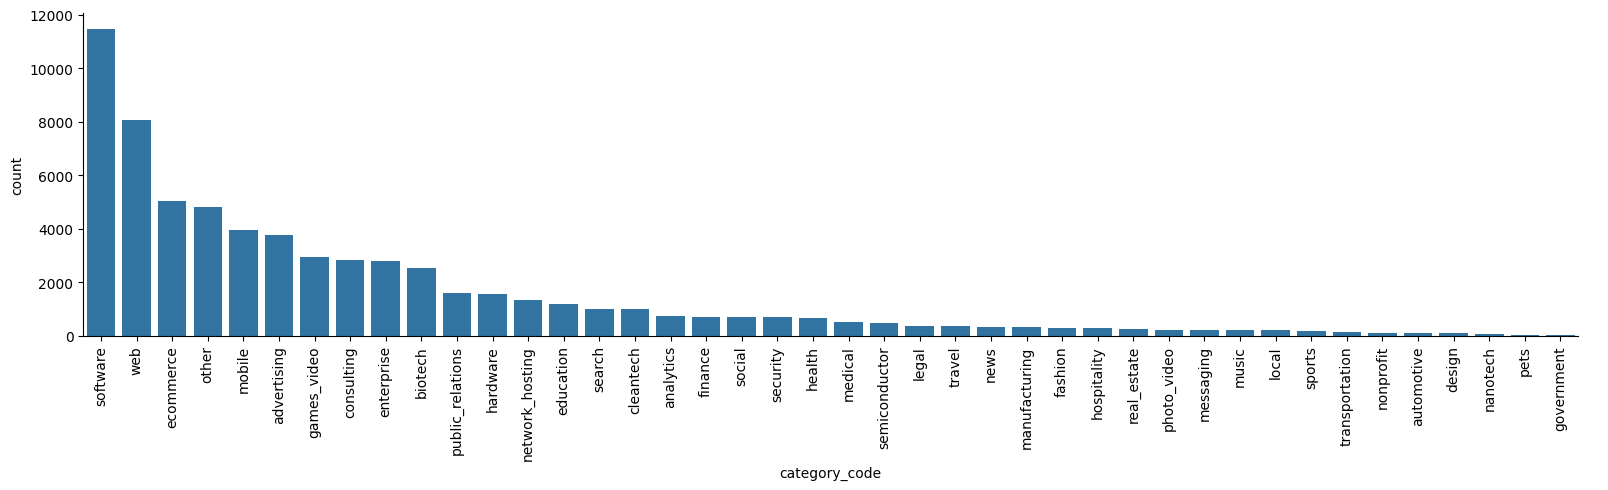

In [15]:
p = sns.catplot(
    data = companies_clean.sort_values('category_code'),
    x = 'category_code',
    kind = 'count',
    order = companies_clean['category_code'].value_counts().index,
    height = 4,
    aspect = 4,
    color = 'tab:blue'
    # palette = 'Blues'
)
for item in p.ax.get_xticklabels():
    item.set_rotation(90)

In [16]:
top_categories = companies_clean[companies_clean['category_code']!='other']['category_code'].value_counts().head(5).index.tolist()


In [17]:
companies_clean.head(5)

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
5,c:10002,Company,10002,NaN,Synergie Media,synergie media,/company/synergie-media,advertising,operating,2007-06-27,...,NaN,0,0.0,NaN,NaN,0,2,NaN,2008-08-24 17:39:10,2008-09-06 14:19:19
6,c:10003,Company,10003,NaN,Green Basti Ecosystems,green basti ecosystems,/company/green-basti-ecosystems,cleantech,operating,2008-08-20,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 19:49:25,2010-04-22 23:48:20
12,c:10009,Company,10009,NaN,dimension5 labs,dimension5 labs,/company/dimension5-labs,advertising,operating,2008-08-01,...,NaN,0,0.0,2008-08-22,2008-08-22,1,2,NaN,2008-08-24 21:54:55,2008-12-21 17:21:53
13,c:1001,Company,1001,NaN,FriendFeed,friendfeed,/company/friendfeed,web,acquired,2007-10-01,...,2008-02-26,1,5000000.0,2008-05-01,2012-09-13,3,14,initial-importer,2007-10-01 10:17:13,2013-03-13 21:44:15


In [18]:
companies_from_top_categories = companies_clean[companies_clean['category_code'].isin(top_categories)][['category_code', 'id']]

In [19]:
raised_money_by_categ_year = pd.merge(left=funding_rounds, right=companies_from_top_categories, left_on='object_id', right_on='id')

In [20]:
money_by_year_category = raised_money_by_categ_year.groupby(by=['funded_at_year', 'category_code'], as_index=False, dropna=True)['raised_amount_usd'].mean()
money_by_year_category['raised_amount_mln_usd'] = round(money_by_year_category['raised_amount_usd'] / 1e6, 2)
money_by_year_category = money_by_year_category[money_by_year_category['funded_at_year'] >= 2000]

In [21]:
money_by_year_category.head()

,funded_at_year,category_code,raised_amount_usd,raised_amount_mln_usd
20,2000.0,advertising,6.500667e+06,6.50
21,2000.0,ecommerce,5.842618e+06,5.84
22,2000.0,mobile,8.285714e+06,8.29
23,2000.0,software,1.089181e+07,10.89
24,2000.0,web,1.667506e+07,16.68


<Axes: xlabel='funded_at_year', ylabel='raised_amount_mln_usd'>

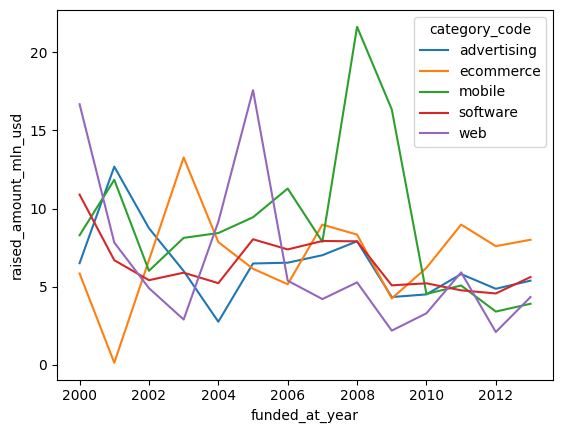

In [22]:
sns.lineplot(x='funded_at_year', y='raised_amount_mln_usd', data=money_by_year_category, hue='category_code')

In [23]:
money_by_category = raised_money_by_categ_year[raised_money_by_categ_year['funded_at_year'] >= 2000]
money_by_category['raised_amount_mln_usd'] = round(money_by_category['raised_amount_usd'] / 1e6, 2)

/var/folders/p2/skh823fd5t5fcl9_fbmxvw24rb6_10/T/ipykernel_47403/4029884172.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  money_by_category['raised_amount_mln_usd'] = round(money_by_category['raised_amount_usd'] / 1e6, 2)


<Axes: xlabel='category_code', ylabel='raised_amount_mln_usd'>

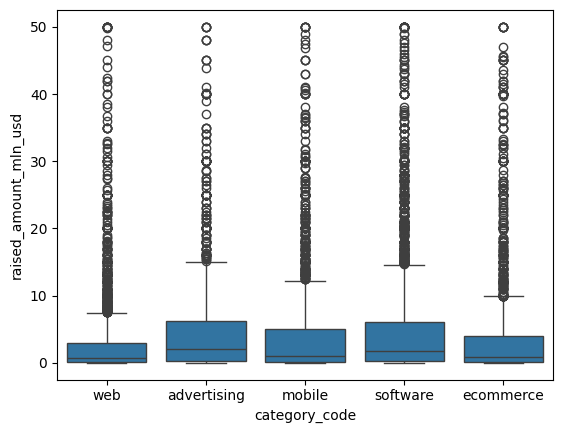

In [24]:
sns.boxplot(x='category_code', y='raised_amount_mln_usd', data=money_by_category[money_by_category['raised_amount_mln_usd'] <= 50])

In [25]:
people = pd.read_csv('fixed_dataset/people.csv')
print(people.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226708 entries, 0 to 226707
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226708 non-null  int64 
 1   object_id         226708 non-null  object
 2   first_name        226699 non-null  object
 3   last_name         226704 non-null  object
 4   birthplace        28084 non-null   object
 5   affiliation_name  226683 non-null  object
dtypes: int64(1), object(5)
memory usage: 10.4+ MB
None


In [26]:
people.head()

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


In [27]:
degrees = pd.read_csv('fixed_dataset/degrees.csv')
print(degrees.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109056 entries, 0 to 109055
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109056 non-null  int64 
 1   object_id     109056 non-null  object
 2   degree_type   97883 non-null   object
 3   subject       80890 non-null   object
 4   institution   109002 non-null  object
 5   graduated_at  57691 non-null   object
 6   created_at    109056 non-null  object
 7   updated_at    109056 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.7+ MB
None


In [28]:
degrees.head()

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


In [32]:
len(degrees['degree_type'].unique())

7115

In [30]:
relationships = pd.read_csv('fixed_dataset/relationships.csv')
print(relationships.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400588 entries, 0 to 400587
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      400588 non-null  int64 
 1   relationship_id         400588 non-null  int64 
 2   person_object_id        400588 non-null  object
 3   relationship_object_id  400588 non-null  object
 4   start_at                206257 non-null  object
 5   end_at                  100593 non-null  object
 6   is_past                 400588 non-null  int64 
 7   sequence                400588 non-null  int64 
 8   title                   387376 non-null  object
 9   created_at              400588 non-null  object
 10  updated_at              400588 non-null  object
dtypes: int64(4), object(7)
memory usage: 33.6+ MB
None


In [31]:
employees = relationships[['person_object_id', 'relationship_object_id']]
employees = employees.groupby('relationship_object_id').count().reset_index()
employees.rename({'relationship_object_id': 'id', 'person_object_id': 'employees'}, axis='columns', inplace=True)
employees.head()

,id,employees
0,c:1,17
1,c:10,6
2,c:100,12
3,c:10002,2
4,c:100042,1
